In [10]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Method 1
based on the defination:
F(n) = F(n-1) + F(n-2)

# Method 2
Revised method by define a list at first.

In [11]:
def fibonacci_number(n):
    if n <= 1:
        return n
    return fibonacci_number(n - 1) + fibonacci_number(n - 2)

In [12]:
Ni = [5, 10, 15, 20, 25]
Fn = []
TimeN1 = []
for i in Ni:
    start = time.time()
    Fn.append(fibonacci_number(i))
    end = time.time()
    TimeN1.append(end-start)

Text(0, 0.5, 'Time (s)')

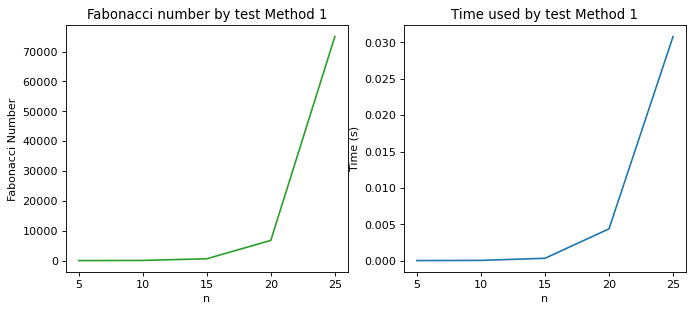

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), dpi= 80)
axes[0].plot(Ni, Fn,'tab:green')
axes[0].set_title('Fabonacci number by test Method 1')
axes[0].set_xlabel('n')
axes[0].set_ylabel('Fabonacci Number')
axes[1].plot(Ni, TimeN1)
axes[1].set_title('Time used by test Method 1')
axes[1].set_xlabel('n')
axes[1].set_ylabel('Time (s)')

# Method 2
Revised method by define a list at first.

In [20]:
def fibonacci_number_M2(n):
    if n <= 1:
        return n
    Fn = [0, 1]
    for i in range(2, n+1):
        Fn.append(Fn[-1]+Fn[-2])
    return Fn[-1]

In [21]:
Ni = [5, 10, 15, 20, 25]
Fn = []
TimeN2 = []
for i in Ni:
    start = time.time()
    Fn.append(fibonacci_number_M2(i))
    end = time.time()
    TimeN2.append(end-start)

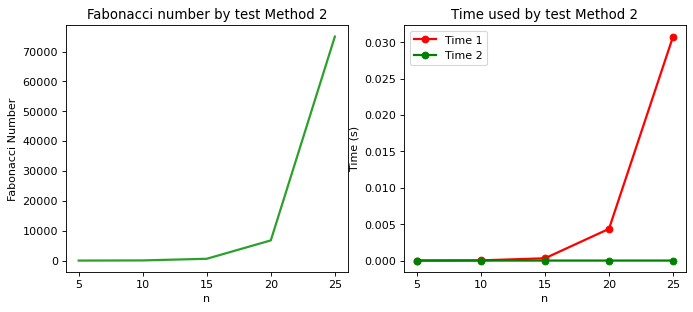

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), dpi= 80)
axes[0].plot(Ni, Fn,'tab:green',linewidth = 2)
axes[0].set_title('Fabonacci number by test Method 2')
axes[0].set_xlabel('n')
axes[0].set_ylabel('Fabonacci Number')
axes[1].plot(Ni, TimeN1,'ro-', label='Method 1', linewidth=2)
axes[1].plot(Ni, TimeN2,'go-', label='Method 2', linewidth=2)
axes[1].set_title('Time used by test Method 2')
axes[1].set_xlabel('n')
axes[1].set_ylabel('Time (s)')
axes[1].legend(['Time 1','Time 2'])

# The last Digit of Fibonacci


In [32]:
def fibonacci_last_digit(n):
    if n <= 1:
        return n
    dp = []
    dp.append(0)
    dp.append(1)
    for i in range(2, n+1):
        dp.append((dp[-1]+dp[-2])% 10) 

    return dp[n]

In [24]:
print(fibonacci_last_digit(331))

9


# Huge Fibonacci
**Task**

Given two integers n and m, output In mod m (that is, the remainder of In when divided by m).

**Input Format**

The input consists of two integers n and m given on the same line (separated by a space).

**Constraints** 

1 <n < 1018, 2 < m < 103.

**Output Format**

Output Fn mod m.

In [40]:
def fibonacci_huge_naive(n, m):
    if n <= 1:
        return n
    dp = ( (6*m)+2 ) * [ 0 ]
    dp[0] = 0
    dp[1] = 1
    dp[2] = 1
    i = 3
    while i <= n and not ( dp[ i-2 ] == 0 and dp[ i-1 ] == 1 ):
        dp[ i ] = ( dp[ i-2 ] + dp[ i-1 ] ) % m
        i += 1
    P = i-2 # (P)isano period
    # case 1) (P)isano period NOT reached, return the N-th fibonacci number
    # case 2) (P)isano period reached, return (N mod P)-th fibonacci number
    ans = dp[ n ] if n <= i-1 else dp[ n % P ]
    return ans

In [41]:
fibonacci_huge_naive(239, 1000)

161

In [42]:
fibonacci_huge_naive(2816213588,239)

151

# The last digit of fabonacci numbers

In [6]:
def sum(dp, N, M):
    ans = 0
    for i in range(0, N+1):
        ans += dp[i]
        ans%= M
    return ans

def fibonacci_sum(N):
    M = 10
    dp = ((6*M)+2)*[0]
    dp[0] = 0
    dp[1] = 1
    dp[2] = 1
    i = 3
    while i <= N and not (dp[i-2] == 0 and dp[i-1] == 1):
        dp[i] = (dp[i-2] +dp[i-1])%M
        i = i+1
    P = i-2
    ans = sum(dp, N, M) if N<= i-1 else sum(dp, N%P, M)
    return ans 

In [8]:
fibonacci_sum(100)

5

# Last Digit of the Sum of Fibonacci Numbers Again

In [15]:
def sum(dp, N, M, L):
    ans = 0
    for i in range( L, N+1 ):
        ans += dp[ i ]
        ans %= M
    return ans

def fibonacci_sum_lastd(L, N):
    M = 10
    dp = ( (6*M)+2 ) * [ 0 ]
    dp[ 0 ] = 0
    dp[ 1 ] = 1
    dp[ 2 ] = 1
    i = 3 # start looking for the pisano period from i=3 to ignore the first 0,1 sequence at dp[ 0 ] and dp[ 1 ]
    while i <= N and not ( dp[ i-2 ] == 0 and dp[ i-1 ] == 1 ):
        dp[ i ] = ( dp[ i-2 ] + dp[ i-1 ] ) % M
        i += 1
        P = i-2 # (P)isano period
        # case 1) (P)isano period NOT reached, return the N-th fibonacci number
        # case 2) (P)isano period reached, return (N mod P)-th fibonacci number
    ans = sum( dp, N, M, L ) if N <= i-1 else sum( dp, N % P, M, L % P )
    return ans

In [17]:
fibonacci_sum_lastd(3,7)

1

# 2.8 Last Digit of the Sum of Squares of Fibonacci Numbers

In [20]:
    def sum( dp, N, M ):
        return ( dp[ N-1 ] * dp[ N ] ) % M if N > 0 else 0

    def fibonacci_lastD_sum( N):
        M = 10
        N += 1 # the sum of squared fibonacci numbers from 0 to N is equal to fib( N ) * fib( N+1 ), so iterate till fib( N+1 )
        dp = ( (6*M)+2 ) * [ 0 ]
        dp[ 0 ] = 0
        dp[ 1 ] = 1
        dp[ 2 ] = 1
        i = 3 # start looking for the pisano period from i=3 to ignore the first 0,1 sequence at dp[ 0 ] and dp[ 1 ]
        while i <= N and not ( dp[ i-2 ] == 0 and dp[ i-1 ] == 1 ):
            dp[ i ] = ( dp[ i-2 ] + dp[ i-1 ] ) % M
            i += 1
        P = i-2 # (P)isano period
        # case 1) (P)isano period NOT reached, return the N-th fibonacci number
        # case 2) (P)isano period reached, return (N mod P)-th fibonacci number
        ans = sum( dp, N, M ) if N <= i-1 else sum( dp, N % P, M )
        return ans

In [22]:
fibonacci_lastD_sum(73)

1